Neural Network Results:
Training MSE: 0.0000
Testing MSE: 0.0007
Training R2: 0.9998
Testing R2: 0.9900


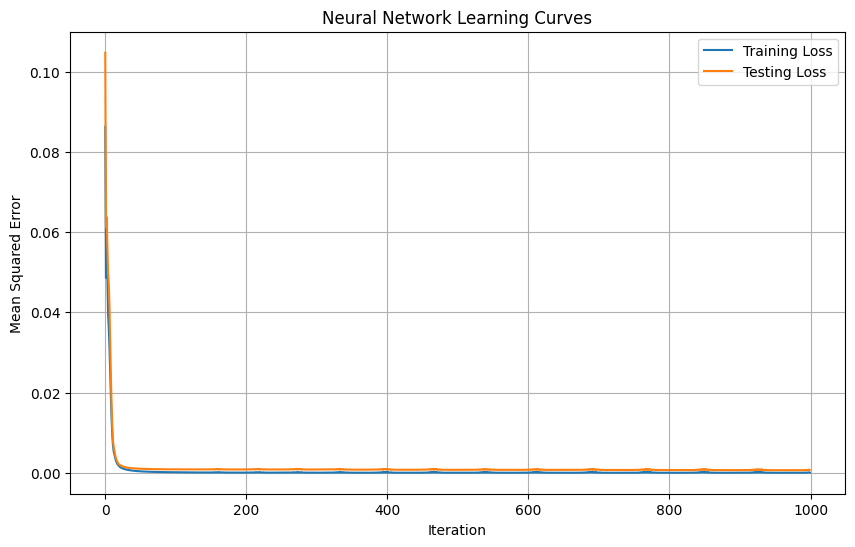

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read and prepare data
df = pd.read_csv('cleaned_data.csv')

# Define features and target
X = df[['thetao', 'so', 'uo', 'vo', 'wo', 'kd', 'ph', 'spco2', 'o2', 'no3', 'po4', 'si', 'fe']]
y = df['chl']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize neural network with specified architecture
# Using 9 hidden layers with decreasing then increasing number of neurons (hourglass shape)
hidden_layers = [30, 35, 40, 45, 50, 45, 40, 35, 30]  # 9 hidden layers
nn = MLPRegressor(
    hidden_layer_sizes=hidden_layers,  # Only hidden layers needed since MLPRegressor automatically adds output layer
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)

# Train model and record losses for each iteration to monitor convergence
train_losses = []
test_losses = []
for i in range(1000):  # max_iter from MLPRegressor
    nn.partial_fit(X_train_scaled, y_train)
    train_pred = nn.predict(X_train_scaled)
    test_pred = nn.predict(X_test_scaled)
    train_losses.append(mean_squared_error(y_train, train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

# Calculate final performance metrics
final_train_pred = nn.predict(X_train_scaled)
final_test_pred = nn.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, final_train_pred)
test_mse = mean_squared_error(y_test, final_test_pred)
train_r2 = r2_score(y_train, final_train_pred)
test_r2 = r2_score(y_test, final_test_pred)

# Print detailed results
print("Neural Network Results:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R2: {train_r2:.4f}")
print(f"Testing R2: {test_r2:.4f}")

# Plot learning curves to visualize model training progress
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Neural Network Learning Curves')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
# Import necessary libraries
import joblib

# Saving the Scalar
joblib.dump(scaler, '/Users/arup/Documents/ISRO-Project/models/scaler.pkl')

# Saving the trained MLPRegressor model using joblib
joblib.dump(nn, '/Users/arup/Documents/ISRO-Project/models/neural_network.pkl')

['/Users/arup/Documents/ISRO-Project/models/neural_network.pkl']


Random Forest Results:
Training MSE: 0.0001
Testing MSE: 0.0008
Training R2: 0.9987
Testing R2: 0.9871


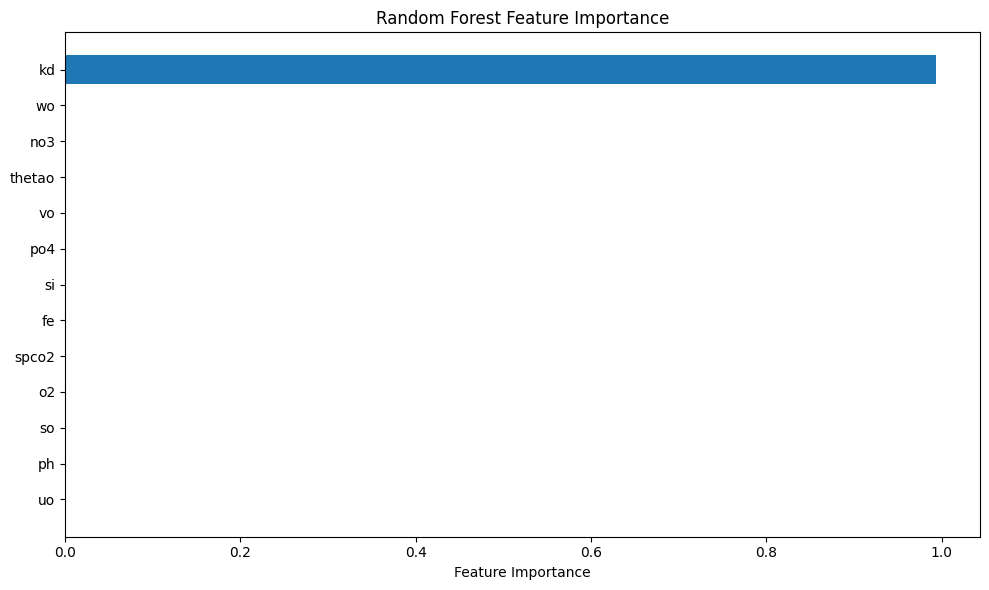

In [3]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
rf_train_pred = rf.predict(X_train_scaled)
rf_test_pred = rf.predict(X_test_scaled)

# Calculate metrics
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

# Print detailed results
print("\nRandom Forest Results:")
print(f"Training MSE: {rf_train_mse:.4f}")
print(f"Testing MSE: {rf_test_mse:.4f}") 
print(f"Training R2: {rf_train_r2:.4f}")
print(f"Testing R2: {rf_test_r2:.4f}")

# Feature importance plot
plt.figure(figsize=(10, 6))
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(y=range(len(importances)), width=importances['importance'])
plt.yticks(range(len(importances)), importances['feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [4]:
# Save the Random Forest model
joblib.dump(rf, '/Users/arup/Documents/ISRO-Project/models/random_forest.pkl')

['/Users/arup/Documents/ISRO-Project/models/random_forest.pkl']

In [5]:
# Calculate SHAP values for Random Forest
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled)

# Get indices of lowest and highest predictions
lowest_pred_idx = rf_test_pred.argmin()
highest_pred_idx = rf_test_pred.argmax()

# Create a DataFrame to display SHAP values for lowest and highest predictions
shap_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Lowest Prediction SHAP Value': shap_values[lowest_pred_idx],
    'Highest Prediction SHAP Value': shap_values[highest_pred_idx]
})

# Print the SHAP values as a table
print("\nSHAP Values for Lowest and Highest Predictions:")
shap_df


SHAP Values for Lowest and Highest Predictions:


,Feature,Lowest Prediction SHAP Value,Highest Prediction SHAP Value
0,thetao,0.000050,0.000042
1,so,0.000212,-0.000401
2,uo,-0.000104,0.000419
3,vo,0.000042,-0.002164
4,wo,-0.000205,0.002563
5,kd,-0.221312,1.002334
6,ph,0.000060,-0.000784
7,spco2,0.000223,-0.000692
8,o2,-0.000032,-0.002190
9,no3,-0.000150,-0.000024


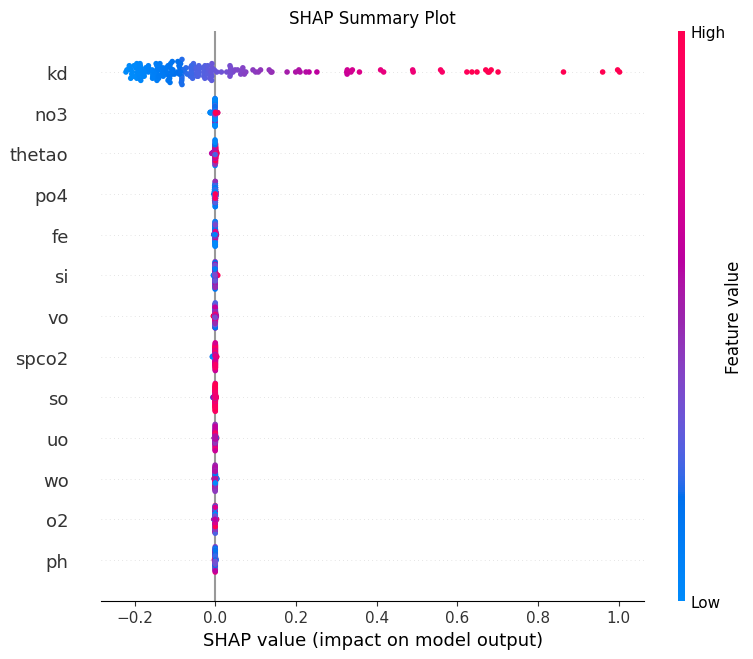

In [6]:
# Create summary plots for lowest and highest predictions
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, show=False)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()


Ensemble Model Results:
Training MSE: 0.0000
Testing MSE: 0.0005
Training R2: 0.9996
Testing R2: 0.9916


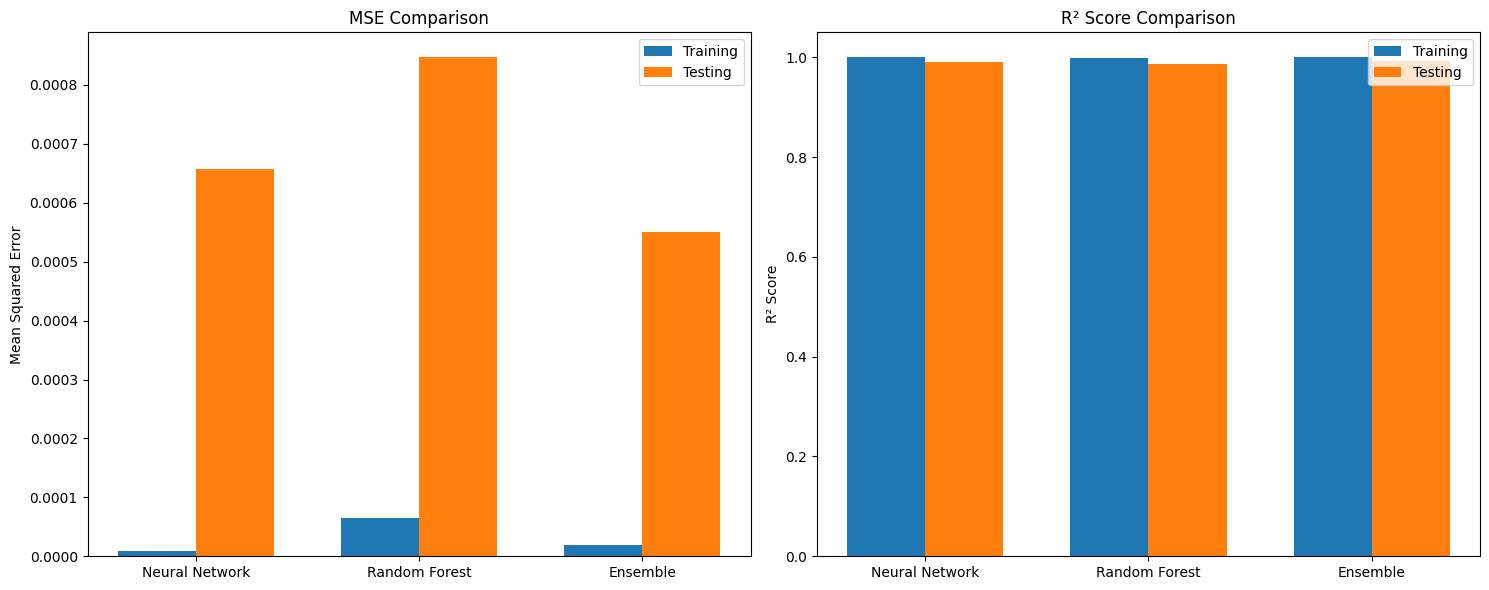

In [7]:
# Create an ensemble model using weighted predictions based on model accuracy
def ensemble_predict(X_scaled):
    nn_pred = nn.predict(X_scaled)
    rf_pred = rf.predict(X_scaled)
    
    # Calculate weights based on R2 scores
    nn_weight = train_r2 / (train_r2 + rf_train_r2)
    rf_weight = rf_train_r2 / (train_r2 + rf_train_r2)
    
    return (nn_pred * nn_weight) + (rf_pred * rf_weight)

# Make ensemble predictions
ensemble_train_pred = ensemble_predict(X_train_scaled)
ensemble_test_pred = ensemble_predict(X_test_scaled)

# Calculate ensemble metrics
ensemble_train_mse = mean_squared_error(y_train, ensemble_train_pred)
ensemble_test_mse = mean_squared_error(y_test, ensemble_test_pred)
ensemble_train_r2 = r2_score(y_train, ensemble_train_pred)
ensemble_test_r2 = r2_score(y_test, ensemble_test_pred)

# Print ensemble results
print("\nEnsemble Model Results:")
print(f"Training MSE: {ensemble_train_mse:.4f}")
print(f"Testing MSE: {ensemble_test_mse:.4f}")
print(f"Training R2: {ensemble_train_r2:.4f}") 
print(f"Testing R2: {ensemble_test_r2:.4f}")

# Compare all models
models = ['Neural Network', 'Random Forest', 'Ensemble']
train_mses = [train_mse, rf_train_mse, ensemble_train_mse]
test_mses = [test_mse, rf_test_mse, ensemble_test_mse]
train_r2s = [train_r2, rf_train_r2, ensemble_train_r2]
test_r2s = [test_r2, rf_test_r2, ensemble_test_r2]

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

x = np.arange(len(models))
width = 0.35

ax1.bar(x - width/2, train_mses, width, label='Training')
ax1.bar(x + width/2, test_mses, width, label='Testing')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()

ax2.bar(x - width/2, train_r2s, width, label='Training')
ax2.bar(x + width/2, test_r2s, width, label='Testing')
ax2.set_ylabel('R² Score')
ax2.set_title('R² Score Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()

plt.tight_layout()
plt.show()